# <CENTER>Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings("ignore")

# <CENTER> Read Data

In [2]:
# Read file 
TG_data = pd.read_csv(r"E:\NIIT\Project\Files\T&G\T&G_5TG_review.csv")

In [3]:
# Read file 
VG_data = pd.read_csv(r"E:\NIIT\Project\Files\VG\VG_5TG_review.csv")

In [4]:
Tg_temp=TG_data.copy()
Vg_temp=VG_data.copy()

In [5]:
print(Tg_temp.shape)
print(Vg_temp.shape)

(167597, 6)
(231780, 6)


In [6]:
len(Tg_temp['ProductID'].value_counts())

11924

# <CENTER>  Sentiment Analysis Using TextBlob

In [7]:
Tweet=TextBlob(Tg_temp['text'][400])
Tweet.sentiment

Sentiment(polarity=-0.07083333333333335, subjectivity=0.4791666666666667)

In [8]:
def s_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

In [9]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [10]:
Tg_temp['senti_score'] = Tg_temp['text'].apply(s_sentiment)

In [11]:
Tg_temp.sample(2)

,reviewerID,ProductID,reviewerName,overall,Date,text,senti_score
80515,A12I1XTSARFJW2,B003K953UK,Justsoyouknow,4.0,2012-01-03,toy nice price currently asked amazon google s...,0.182500
33211,AF6Y350TU9EOA,B000GKXY66,kayell,4.0,2013-04-15,normally fan wooden toy think make harder put ...,0.150521


In [12]:
Tg_temp['sentiment'] = Tg_temp['text'].apply(analyze_sentiment)

In [13]:
Tg_temp['sentiment'].value_counts()

Positive    154821
Negative     11689
Neutral       1087
Name: sentiment, dtype: int64

In [14]:
from wordcloud import WordCloud
WordCloud

wordcloud.wordcloud.WordCloud

In [15]:
positive_tg_text = Tg_temp[Tg_temp['sentiment'] == 'Positive']['text']
negative_tg_text = Tg_temp[Tg_temp['sentiment'] == 'Negative']['text']
neutral_tg_text = Tg_temp[Tg_temp['sentiment'] == 'Neutral']['text']

In [16]:
positive_tg = ' '.join(positive_tg_text)
negative_tg = ' '.join(negative_tg_text)
neutral_tg = ' '.join(neutral_tg_text)

# <CENTER> Toy&Games Visualization

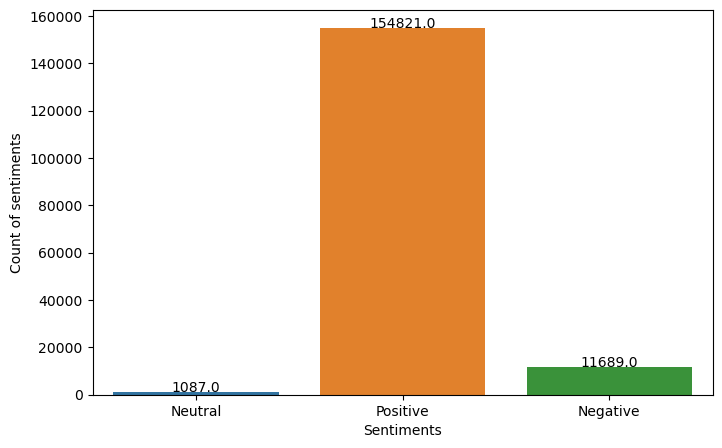

In [17]:
import seaborn as sns
plt.figure(figsize=(8, 5))
plot = sns.countplot(x='sentiment', data=Tg_temp)
plt.xlabel("Sentiments")
plt.ylabel("Count of sentiments")
for p in plot.patches:
    plot.annotate(str(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height() + 50), ha='center')
plt.show()

# Using Wordcloud 

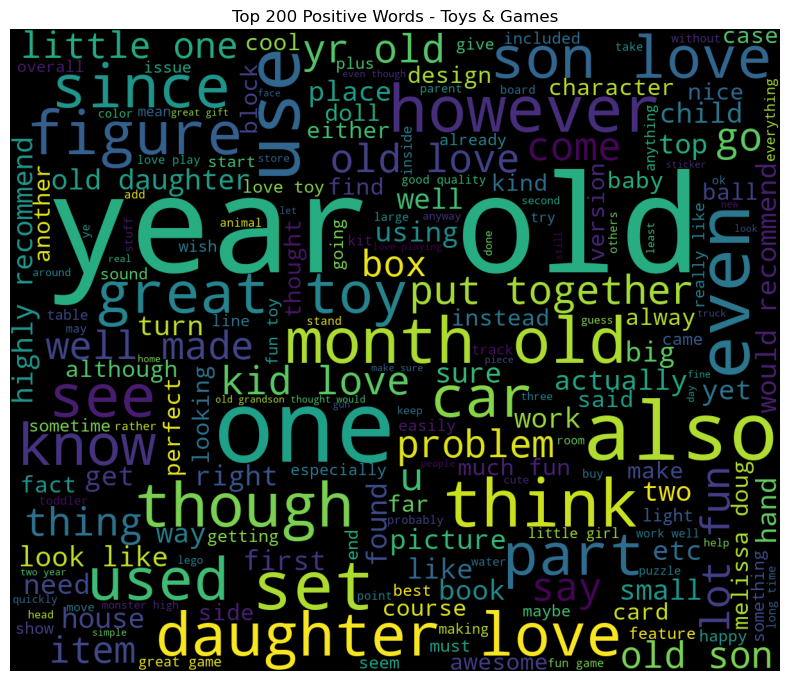

In [45]:
positive_cloud=WordCloud(height=1000,width=1200,max_words=200,stopwords=stopwords.words("english"),background_color='black').generate(positive_tg)
plt.figure(figsize=(8,8))
plt.imshow(positive_cloud)
plt.title('Top 200 Positive Words - Toys & Games')
plt.axis('off')
plt.tight_layout()
plt.show()

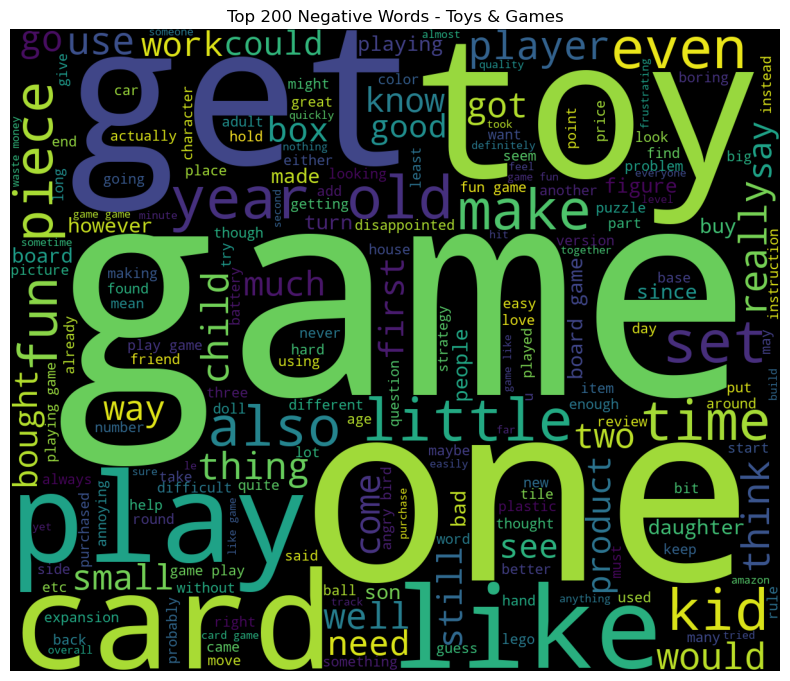

In [44]:
negative_cloud=WordCloud(height=1000,width=1200,max_words=200,stopwords=stopwords.words("english"),background_color='black').generate(negative_tg)
plt.figure(figsize=(8,8))
plt.imshow(negative_cloud)
plt.title('Top 200 Negative Words - Toys & Games')
plt.axis('off')
plt.tight_layout()
plt.show()

# <CENTER> Using VADER Visualization

In [20]:
vader=Tg_temp.copy()

In [21]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Rishabh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [22]:
vader['scores'] = vader['text'].apply(lambda text: sid.polarity_scores(text))

In [23]:
vader['compound'] = vader['scores'].apply(lambda score_dict: score_dict['compound'])
vader['sentiment_type']=''
vader.loc[vader.compound>0,'sentiment_type']='POSITIVE'
vader.loc[vader.compound==0,'sentiment_type']='NEUTRAL'
vader.loc[vader.compound<0,'sentiment_type']='NEGATIVE'

In [24]:
vader['sentiment_type'].value_counts()

POSITIVE    160585
NEGATIVE      6234
NEUTRAL        778
Name: sentiment_type, dtype: int64

In [25]:
vader.head()

,reviewerID,ProductID,reviewerName,overall,Date,text,senti_score,sentiment,scores,compound,sentiment_type
0,A1VXOAVRGKGEAK,0439893577,Angie,5.0,2014-01-29,like item pricing granddaughter wanted mark wa...,0.000000,Neutral,"{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'comp...",0.3612,POSITIVE
1,A8R62G708TSCM,0439893577,Candace,4.0,2014-03-28,love magnet easel great moving different area ...,0.375000,Positive,"{'neg': 0.0, 'neu': 0.432, 'pos': 0.568, 'comp...",0.9545,POSITIVE
2,A21KH420DK0ICA,0439893577,capemaychristy,5.0,2013-01-28,side magnetic real plus entertaining one child...,0.241071,Positive,"{'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'comp...",0.9260,POSITIVE
3,AR29QK6HPFYZ4,0439893577,dcrm,5.0,2014-02-08,bought one year ago daughter love still using ...,0.566667,Positive,"{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'comp...",0.9432,POSITIVE
4,ACCH8EOML6FN5,0439893577,DoyZ,4.0,2014-05-05,stainless steel refrigerator therefore much sp...,0.500000,Positive,"{'neg': 0.0, 'neu': 0.461, 'pos': 0.539, 'comp...",0.9565,POSITIVE


In [26]:
local_df=vader[['text','senti_score','sentiment','compound','sentiment_type']]

In [27]:
local_df.to_csv('temporary_senti.csv',index=False)

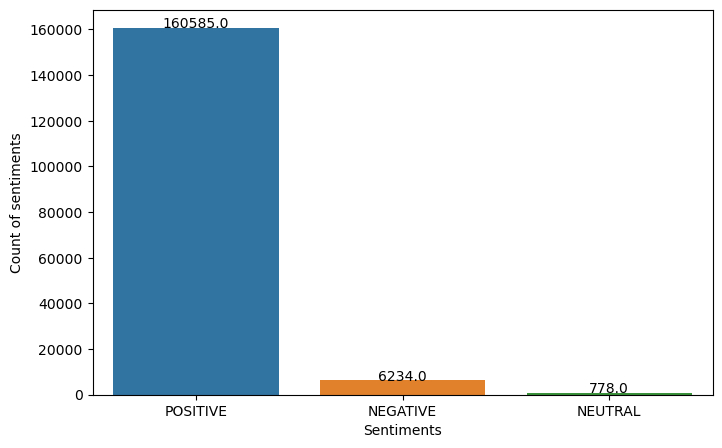

In [28]:
import seaborn as sns
plt.figure(figsize=(8, 5))
plot = sns.countplot(x='sentiment_type', data=vader)
plt.xlabel("Sentiments")
plt.ylabel("Count of sentiments")
for p in plot.patches:
    plot.annotate(str(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height() + 50), ha='center')
plt.show()

In [29]:
positive_vader_tg = vader[vader['sentiment_type'] == 'POSITIVE']['text']
vader_ptv_tg = ' '.join(positive_vader_tg)

## Using Wordcloud 

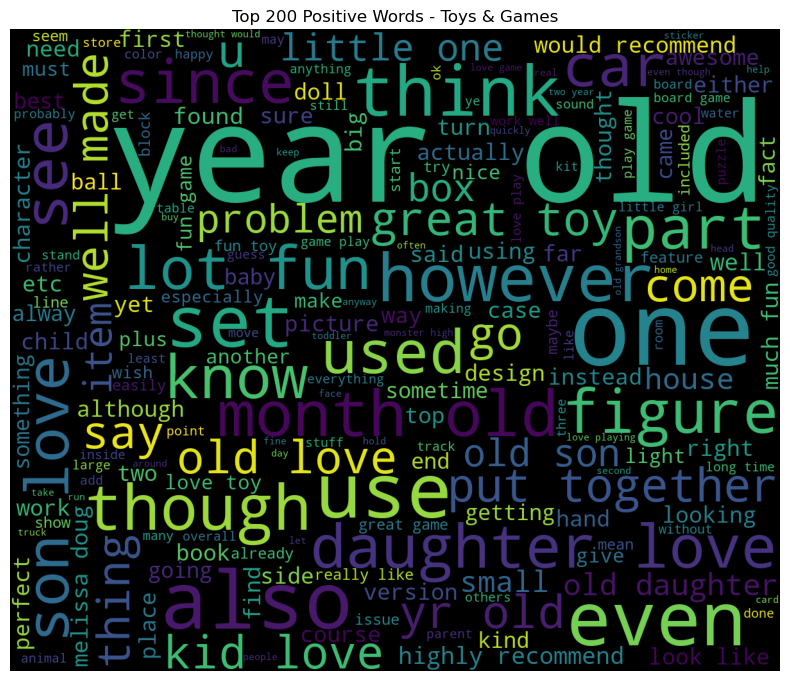

In [30]:
vader_ptv_cloud=WordCloud(height=1000,width=1200,max_words=200,stopwords=stopwords.words("english"),background_color='black').generate(vader_ptv_tg)
plt.figure(figsize=(8,8))
plt.imshow(vader_ptv_cloud)
plt.title('Top 200 Positive Words - Toys & Games')
plt.axis('off')
plt.tight_layout()
plt.show()

## Exporting the file to check the better performing analysis among TextBlob and Vader

In [31]:
negative_vader_tg = vader[vader['sentiment_type'] == 'NEGATIVE']['text']
vader_ntv_tg = ' '.join(negative_vader_tg)

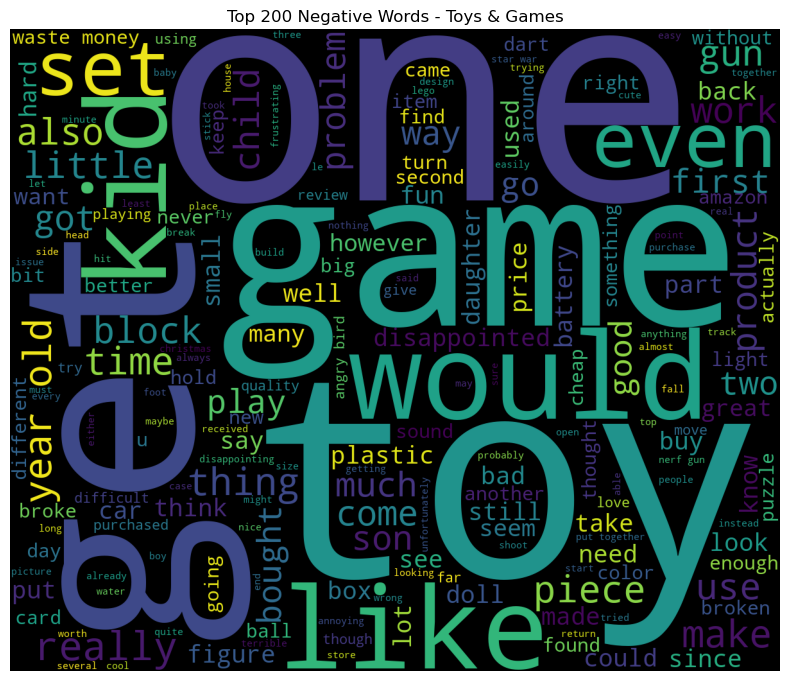

In [32]:
vader_ntv_cloud=WordCloud(height=1000,width=1200,max_words=200,stopwords=stopwords.words("english"),background_color='black').generate(vader_ntv_tg)
plt.figure(figsize=(8,8))
plt.imshow(vader_ntv_cloud)
plt.title('Top 200 Negative Words - Toys & Games')
plt.axis('off')
plt.tight_layout()
plt.show()

In [33]:
fil=vader[vader['overall']==1]
col=['text','sentiment','sentiment_type']
check=fil.loc[:,col]
file_path = r"E:\NIIT\Project\VS_file\check.csv"
check.to_csv(file_path,index=False)

# <CENTER> Video Games Data Visualization

In [34]:
len(Vg_temp['ProductID'].value_counts())

10672

In [35]:
Vg_temp['senti_score'] = Vg_temp['text'].apply(s_sentiment)

In [36]:
Vg_temp['sentiment'] = Vg_temp['text'].apply(analyze_sentiment)

In [37]:
Vg_temp['sentiment'].value_counts()

Positive    173567
Negative     56358
Neutral       1855
Name: sentiment, dtype: int64

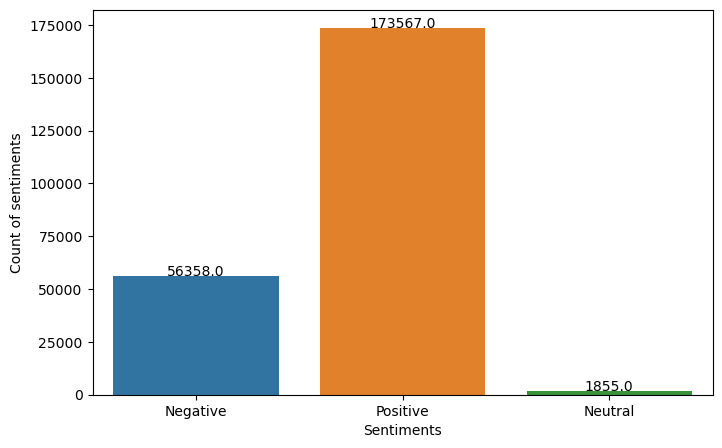

In [38]:
import seaborn as sns
plt.figure(figsize=(8, 5))
plot = sns.countplot(x='sentiment', data=Vg_temp)
plt.xlabel("Sentiments")
plt.ylabel("Count of sentiments")
for p in plot.patches:
    plot.annotate(str(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height() + 50), ha='center')
plt.show()

In [39]:
from wordcloud import WordCloud
WordCloud

wordcloud.wordcloud.WordCloud

In [40]:
positive_vg_text = Vg_temp[Vg_temp['sentiment'] == 'Positive']['text']
negative_vg_text = Vg_temp[Vg_temp['sentiment'] == 'Negative']['text']
neutral_vg_text = Vg_temp[Vg_temp['sentiment'] == 'Neutral']['text']

In [41]:
positive_vg = ' '.join(positive_vg_text)
negative_vg = ' '.join(negative_vg_text)
neutral_vg = ' '.join(neutral_vg_text)

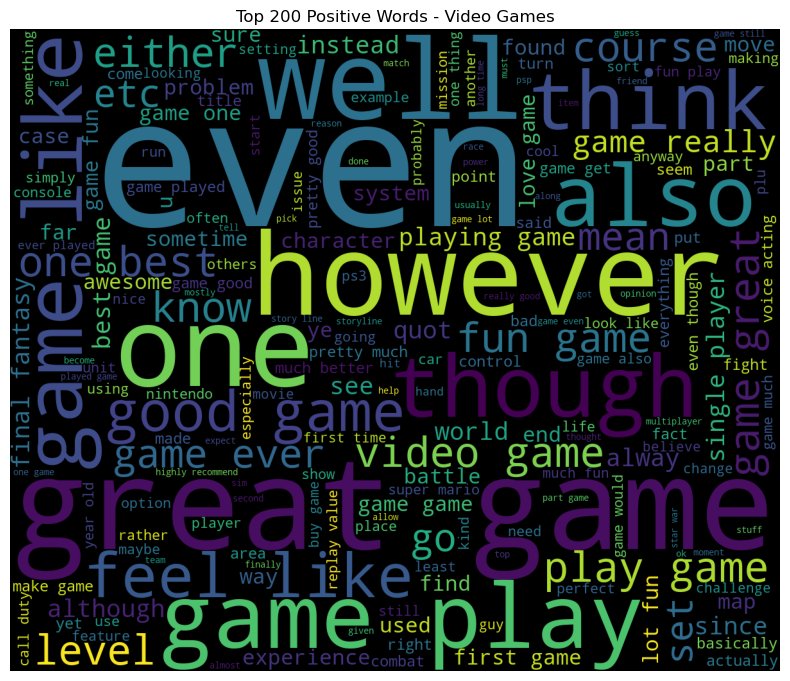

In [46]:
positive_cloud=WordCloud(height=1000,width=1200,max_words=200,stopwords=stopwords.words("english"),background_color='black').generate(positive_vg)
plt.figure(figsize=(8,8))
plt.imshow(positive_cloud)
plt.title('Top 200 Positive Words - Video Games')
plt.axis('off')
plt.tight_layout()
plt.show()

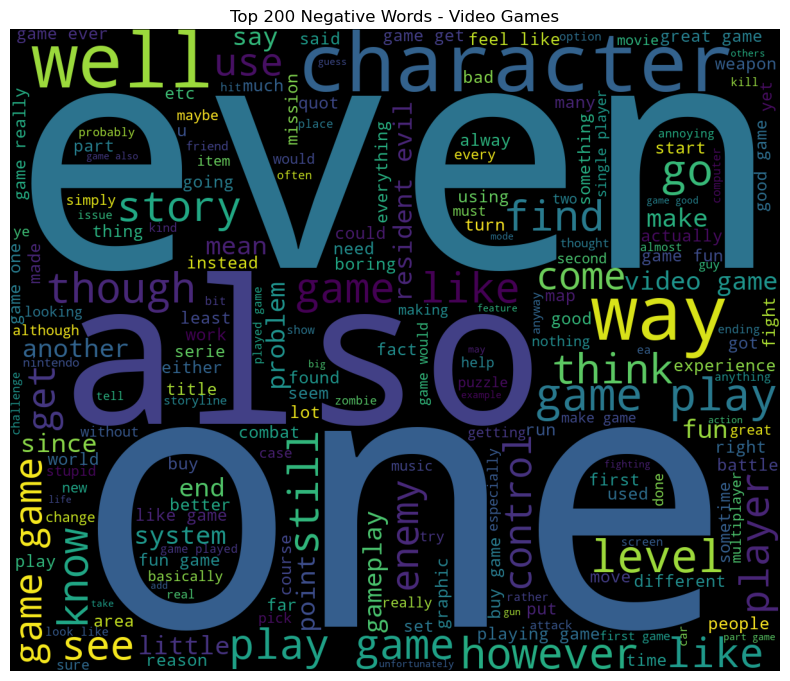

In [47]:
negative_cloud=WordCloud(height=1000,width=1200,max_words=200,stopwords=stopwords.words("english"),background_color='black').generate(negative_vg)
plt.figure(figsize=(8,8))
plt.imshow(negative_cloud)
plt.title('Top 200 Negative Words - Video Games')
plt.axis('off')
plt.tight_layout()
plt.show()

# Combining_EDA_REVIEW_DATA

# TOY&GAMES

In [48]:
TG_EDA = pd.read_csv(r"E:\NIIT\Project\Files\T&G\T&G_EDA_Data.csv")
TG_EDA.head(2)

,ProductID,title,price,Category,Sub-category,also_buy
0,0000191639,Dr. Suess 19163 Dr. Seuss Puzzle 3 Pack Bundle,37.12,Toys & Games,Puzzles,0
1,0005069491,Nursery Rhymes Felt Book,15.66,Toys & Games,Toys & Games,0


In [50]:
merged_TG= pd.merge(Tg_temp,TG_EDA, on='ProductID', how='inner')

In [51]:
merged_TG.to_csv('T&G_Data.csv', index=False)

# Video_Games

In [49]:
VG_EDA =pd.read_csv(r"E:\NIIT\Project\Files\VG\VG_EDA_Data.csv")
VG_EDA.head(2)

,ProductID,price,Category,Sub-category,also_buy
0,0078764343,37.98,Video Games,Xbox 360,1
1,043933702X,23.50,Video Games,PC,0


In [52]:
merged_VG= pd.merge(VG_EDA, Vg_temp, on='ProductID', how='inner')

In [53]:
merged_VG.to_csv('VG_Data.csv', index=False)